In [1]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='S7LAJYJXKS29HWS8',output_format='pandas')
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize']= 16,8
plt.style.use('seaborn-darkgrid')
import numpy as np
import plotly.graph_objects as go
from datetime import datetime
import pandas as pd
from urllib.parse import urlencode
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import ruptures as rpt
import changefinder
from statsmodels.tsa.stattools import adfuller

C:\Users\casos\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
quotes, meta_data = ts.get_intraday(symbol='EURUSD',interval='1min', outputsize='full')
del(quotes['5. volume'])
quotes = quotes.rename(columns = {'1. open':'Open', '2. high':'High', '3. low':'Low', '4. close':'Close'})

In [3]:
quotesd, meta_datad = ts.get_daily(symbol='EURUSD', outputsize='full')
del(quotesd['5. volume'])
quotesd = quotesd.rename(columns = {'1. open':'Open', '2. high':'High', '3. low':'Low', '4. close':'Close'})

In [4]:
quotes = quotes[::-1]
quotesd = quotesd[::-1]
serie = np.array(quotesd.Close)
serie2 = np.array(quotes.Close)

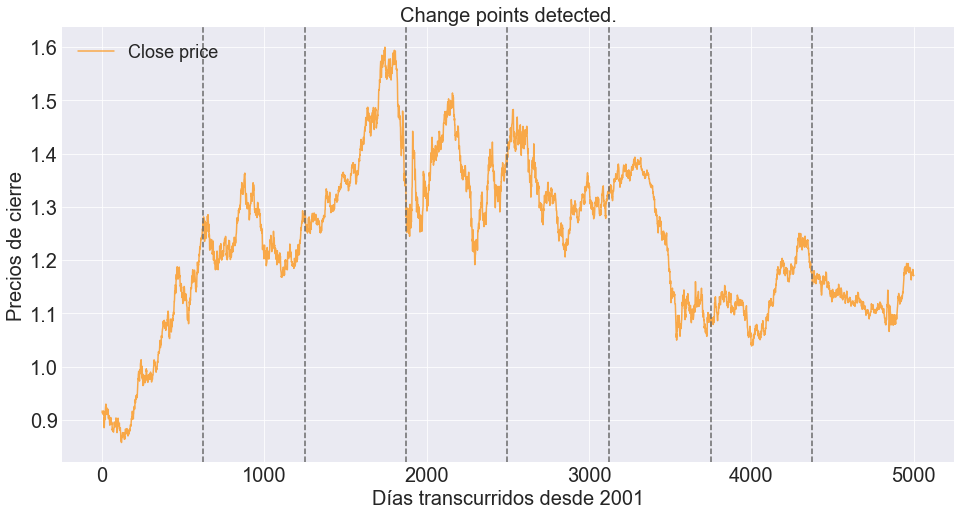

In [99]:
n, dim = len(serie), 1  # number of samples, dimension
sigma = serie.std()
model = "rbf" ,"l1", "l2", "linear", "normal", "ar"
suma = []
prom = []

for i in range (0,500):
    algo = rpt.Window(width=10).fit(serie)
    my_bkps = algo.predict(pen=np.log(n)*dim*sigma**2)
    signal, bkps = rpt.pw_constant(n_samples=n, n_features=dim, n_bkps=len(my_bkps), noise_std=sigma)
    algo = rpt.Window(width=10).fit(signal)
    my_bkps = algo.predict(pen=np.log(n)*dim*sigma**2)
    suma.append(my_bkps)
senal = pd.DataFrame(suma)

for i in range (0,500):
    if len(suma[i]) == (len(bkps)):
        pass
    else:
        senal = senal.drop([i, i])
        
senal = senal.dropna(1)

for i in range (0, len(bkps)):
    prom.append(senal[i].mean())
    
prom = pd.DataFrame(prom)
prom = prom.round()
mean = np.array(prom)

plt.figure(figsize=(16,8))
plt.title('Change points detected.', size=20)
plt.plot(serie, label='Close price' ,color='darkorange', alpha = 0.7)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.xlabel('Días transcurridos desde 2001',size=20)
plt.ylabel('Precios de cierre',size=20)
plt.legend(loc='upper left', fontsize=(18))
for i in range (len(bkps)-1):
    plt.axvline(x=mean[i], ymin=0,ymax=1.6, color='dimgray', linestyle='--')

In [100]:
def change_point_window(n, dim, sigma, serie):
    
    suma = []
    prom = []

    for i in range (0,500):
        algo = rpt.Window(width=10).fit(serie)
        my_bkps = algo.predict(pen=np.log(n)*dim*sigma**2)
        signal, bkps = rpt.pw_constant(n_samples=n, n_features=dim, n_bkps=len(my_bkps), noise_std=sigma)
        algo = rpt.Window(width=10).fit(signal)
        my_bkps = algo.predict(pen=np.log(n)*dim*sigma**2)
        suma.append(my_bkps)
    senal = pd.DataFrame(suma)

    for i in range (0,500):
        if len(suma[i]) == (len(bkps)):
            pass
        else:
            senal = senal.drop([i, i])

    senal = senal.dropna(1)

    for i in range (0, len(bkps)):
        prom.append(senal[i].mean())

    prom = pd.DataFrame(prom)
    prom = prom.round()
    prom = prom.drop(len(bkps)-1)
    mean = np.array(prom)
    
    return mean

In [110]:
def change_point_binary(n, dim, sigma, serie):
    
    suma = []
    prom = []

    for i in range (0,500):
        algo = rpt.Binseg().fit(serie)
        my_bkps = algo.predict(pen=np.log(n)*dim*sigma**2)
        signal, bkps = rpt.pw_constant(n_samples=n, n_features=dim, n_bkps=len(my_bkps), noise_std=sigma)
        algo = rpt.Binseg().fit(signal)
        my_bkps = algo.predict(pen=np.log(n)*dim*sigma**2)
        suma.append(my_bkps)
    senal = pd.DataFrame(suma)

    for i in range (0,500):
        if len(suma[i]) == (len(bkps)):
            pass
        else:
            senal = senal.drop([i, i])

    senal = senal.dropna(1)

    for i in range (0, len(bkps)):
        prom.append(senal[i].mean())

    prom = pd.DataFrame(prom)
    prom = prom.round()
    prom = prom.drop(len(bkps)-1)
    mean = np.array(prom)
    
    return mean